## Introduction

In this notebook, we will analyse the dataset [Credit Card Fraud](https://www.kaggle.com/mlg-ulb/creditcardfraud) from [Kaggle](https://www.kaggle.com) as well as using various predictive models to predict whether a transaction is normal or a fraud transaction. 

In [1]:
#importing libraries

import numpy as np #linear algebra
import pandas as pd #data preprocessing
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization

%matplotlib inline


In [2]:
df = pd.read_csv('./datasets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

The columns **V1** to **V28** are PCA transformed. The background information of these various V* columns are not provided due to confidentiality issues.

In [5]:
#Checking for null or missing values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

***Note:*** There are no missing values

Further, since ***Time*** and ***Amount*** are the only background information we have, we analyse how they affect the transactions.

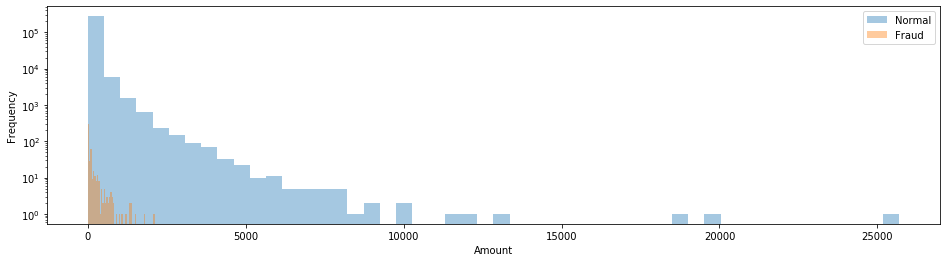

In [6]:
plt.figure(figsize=(16, 4))
sns.distplot(df['Amount'][df['Class'] == 0], bins=50, label='Normal', kde=False)
sns.distplot(df['Amount'][df['Class'] == 1], bins=50, label='Fraud', kde=False)
plt.legend()
plt.yscale('log')
plt.ylabel('Frequency')
plt.show()

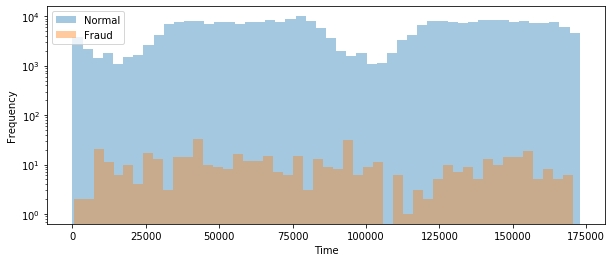

In [7]:
plt.figure(figsize=(10, 4))
sns.distplot(df['Time'][df['Class'] == 0], bins=50, label='Normal', kde=False)
sns.distplot(df['Time'][df['Class'] == 1], bins=50, label='Fraud', kde=False)
plt.legend()
plt.yscale('log')
plt.ylabel('Frequency')
plt.show()

From the above we can see that there is no distinguishing factor that identifies fraud or normal transactions with ***Amount*** and ***Time*** attribute. Hence, we drop these two attributes.


In [8]:
df2 = df.drop(['Amount', 'Time'], axis=1)

Percentage of Normal Transactions:  99.83 %
Percentage of Fraud Transactions: 0.17 %


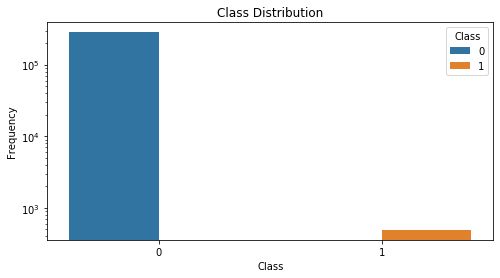

In [9]:
print('Percentage of Normal Transactions: ', round(df2['Class'].value_counts()[0]/len(df2) * 100, 2), '%')
print('Percentage of Fraud Transactions:', round(df2['Class'].value_counts()[1]/len(df2) * 100, 2), '%')

plt.figure(figsize = (8, 4))
sns.countplot('Class', data = df2, hue='Class')
plt.title('Class Distribution')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

From the above, we can see how highly imbalanced the dataset is. 
### Balanced vs Imbalanced dataset
**Balanced Dataset:** A balanced dataset is one where the class distribution are more or less even, say 50-50 or 60-40.

**Imbalanced Dataset:** Imbalanced dataset is one where the distribution of one class is highly outnumbered by the other, like in this case where the normal transactions consist of 99.83% whereas fraud transactions consist of only 0.17%. Similarly, if we have a distribution of 90-10 is also considered imbalanced.

### Problems that arises
- Using a standard accuracy score as a metric to determine the accuracy won't work.
- Using traditional machine learning techniques directly on the dataset won't work as the model won't be able to learn the other classes as well as the other classes.

In [10]:
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [11]:
X = df2.drop('Class', axis = 1)
y = df2['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20)
y_pred = np.zeros(len(y_test))
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9982795547909132


As seen from above, if we just predict everything as normal transaction we would still obtain an accuracy of 99.83%. Hence using the standard accuracy score won't work.
To solve this problem, use precision, recall, f1-score or confusion matrix.

Before coming to what is precision recall, f1-score we need to know the following terms:
- **True Positives:** The transaction is ***correctly classified*** as fraud transaction.
- **True Negatives:** The transaction is classified as ***correctly classified*** as normal transaction.
- **False Positives:** The transaction is classified as ***fraud*** but in actual is normal.
- **False Negatives:** The transaction is classified as ***normal*** but in actual is fraud.

**Precision:** True Positives/(True Positives + False Positives)<br/>
**Recall:** True Positives/(True Positives + False Negatives)<br/>
**F1-score:** (2 * Precision * Recall)/(Precision + Recall)

In general, precision is how precise is our model is in detecting fraud while recall is the amount of fraud cases our model is able to detect. In ideal case, we would want both precision and recall to have high score. However, in practice attaining high precision and recall is difficult. Since we are working on predicting fraud cases, we would emphasize more on recall than precision. **[It's okay to consider a few normal transactions as fraud but we wouldn't want to consider the fraud transactions as normal.]**

In [12]:
#Function for precision score, recall score, f1-score and confusion matrix.
def accuracy_test(ytest, ypred):
    print(f'Precision: {round(precision_score(ytest, ypred) * 100, 2)}')
    print(f'Recall: {round(recall_score(ytest, ypred) *100, 2)}')
    print(f'F1-score: {round(f1_score(ytest, ypred) * 100, 2)}')
    cm = confusion_matrix(ytest, ypred)
    df_cm = pd.DataFrame(cm, [0, 1], [0, 1])
    plt.figure()
    sns.set(font_scale=1.3)
    sns.heatmap(df_cm, annot=True, annot_kws = {'size' : 16})
    plt.ylabel("True Label")
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()


Classifier: LogisticRegression
Precision: 88.41
Recall: 62.24
F1-score: 73.05


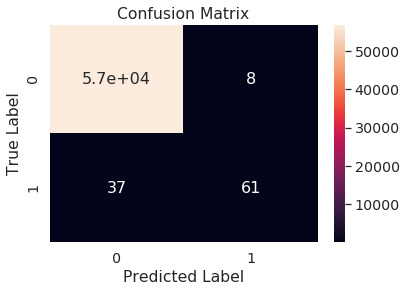


Classifier: KNearest
Precision: 95.35
Recall: 83.67
F1-score: 89.13


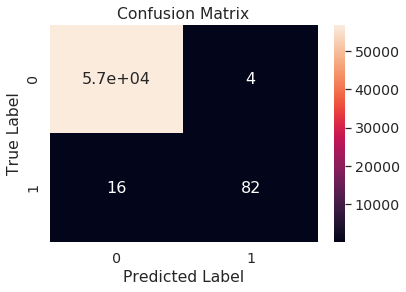


Classifier: SVC
Precision: 95.83
Recall: 70.41
F1-score: 81.18


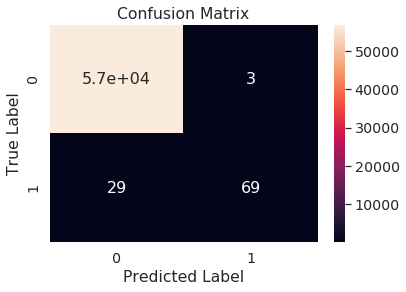

In [13]:
#classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(),
    'KNearest': KNeighborsClassifier(),
    'SVC': SVC()
}

for name, classifier in classifiers.items():
    print(f'\nClassifier: {name}')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_test(y_test, y_pred)

From the above, we can see that almost 40% of the fraud transactions were considered as normal transactions. Hence, using traditional machine learning algorithms directly on the dataset would not work. The issue can be resolve in the following ways:
- **Under Sampling:** Involves removing some of the normal transanctions to an equivalent number of the fraud transactions to have a balance dataset.
- **Over Sampling:** Involves adding new points to the fraud transactions to an equivalent number of the normal transactions to have a balance dataset.

In [14]:
no_frauds = len(df2[df2['Class'] == 1])
normal_indices = np.array(df2[df2['Class'] == 0].index)
fraud_indices = np.array(df2[df2['Class'] == 1].index)

random_indices = np.random.choice(normal_indices, no_frauds, replace = False)

undersample_indices = np.concatenate([fraud_indices, random_indices])
new_df = df2.iloc[undersample_indices, :]


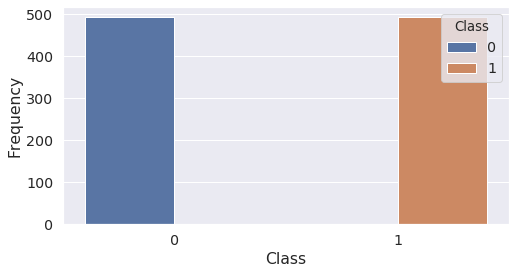

In [15]:
plt.figure(figsize=(8,4))
sns.countplot('Class', data=new_df, hue='Class')
plt.ylabel('Frequency')
plt.show()

From the above, the dataset is now balanced.


Classifier: LogisticRegression
Precision: 90.11
Recall: 94.25
F1-score: 92.13


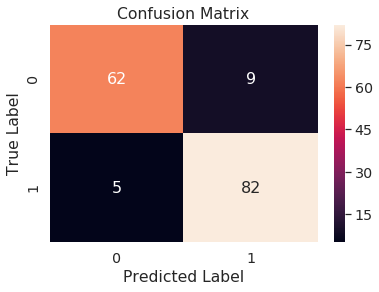


Classifier: KNearest
Precision: 85.71
Recall: 96.3
F1-score: 90.7


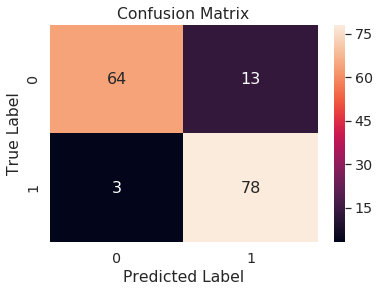


Classifier: SVC
Precision: 91.21
Recall: 97.65
F1-score: 94.32


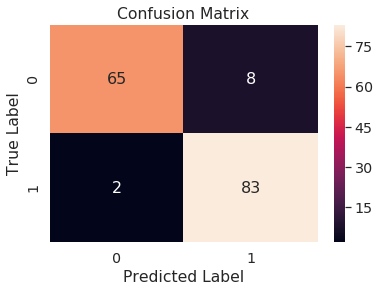

In [16]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_val)
    print(f'\nClassifier: {name}')
    accuracy_test(y_pred, y_val)

***GridSearchCV*** is used to determine the best parameters that gives the best predictive score for the classifiers.

In [17]:
log_reg_params = {'penalty': ['l1', 'l2'], 
                  'C': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

knears_params = {'n_neighbors': list(range(2, 8)), 
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears = grid_knears.best_estimator_

svc_params = {'C': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000],
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'degree':list(range(1, 5))}

grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

Replacing the parameters of various classifiers witht the best parameters. Classifying the ***validation set*** again with the best parameters.


Classifier: LogisticRegression
Precision: 86.81
Recall: 97.53
F1-score: 91.86


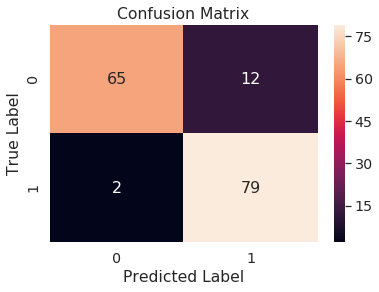


Classifier: KNearest
Precision: 84.62
Recall: 96.25
F1-score: 90.06


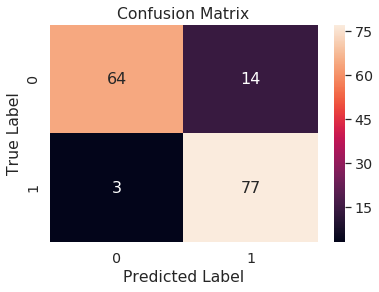


Classifier: SVC
Precision: 83.52
Recall: 97.44
F1-score: 89.94


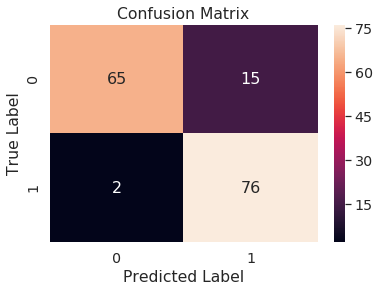

In [18]:
#classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(C=log_reg.C, penalty = log_reg.penalty),
    'KNearest': KNeighborsClassifier(n_neighbors=knears.n_neighbors, algorithm=knears.algorithm),
    'SVC': SVC(C = svc.C, kernel=svc.kernel, degree=svc.degree)
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_val)
    print(f'\nClassifier: {name}')
    accuracy_test(y_pred, y_val)

Predicting the ***test set*** with the best parameters.


Classifier: LogisticRegression
Precision: 100.0
Recall: 92.31
F1-score: 96.0


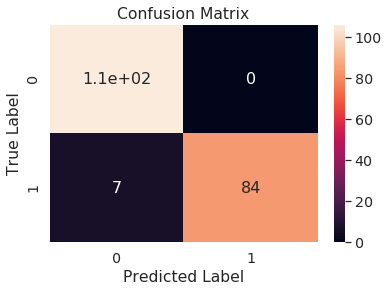


Classifier: KNearest
Precision: 100.0
Recall: 87.91
F1-score: 93.57


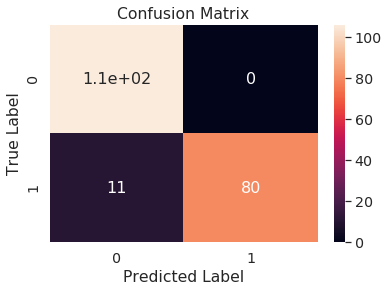


Classifier: SVC
Precision: 100.0
Recall: 92.31
F1-score: 96.0


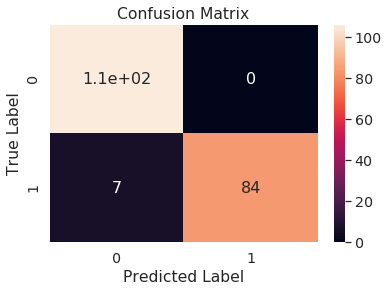

In [19]:
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(f'\nClassifier: {name}')
    accuracy_test(y_test, y_pred)

# Future Work
- Oversampling
- Deep Learning